# Pymaceuticals Inc.
---
## Analyzing the Linear Regression of Capomulin Drug Regimen
### Data Analysis by Thay Chansy
---
  
### Summary
<p>The results suggest a <strong>strong positive linear</strong> relationship between the independent and dependent variables, with a very high p-value indicating a statistically significant association.
A lower <strong>Standard Error</strong> at 1.0249 suggests a relatively <strong>tight fit</strong> of the regression model.    
The <strong>R-squared</strong> value of 0.9034 confirms that the linear model explains a significant portion of the variance in the data and indicates a <strong> very strong positive</strong> linear relationship between x_values and y_values..
A <strong>P-value</strong> of 0.9999999999999923 is <strong>extremely high</strong>, indicating that the observed positive association is almost certainly <strong>not due to chance</strong>.
</p>

<p><strong>x-value</strong>: Weight (g)</p>
<p><strong>y-value</strong>: Avg Tumor Volume (mm3)</p>
<p><strong>Slope (m)</strong>: 0.8947726097340611</p>
<p><strong>Y-intercept (b):</strong> 22.764229983591935</p>
<p><strong>Standard error of the estimate (SE):</strong> 1.0249929158261613</p>
<p><strong>R-squared:</strong> 0.9034966277438602</p>
<p><strong>P-value:</strong> 0.9999999999999923</p>
<p><strong>Linear Equation:</strong> y = 0.8947726097340611(X) + 22.764229983591935</p>
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study_combined_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [2]:
# Checking the number of mice.
total_mice = mouse_study_combined_df['Mouse ID'].nunique()

#display results
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# display results
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identify duplicate mouse IDs (considering both 'Mouse ID' and 'Timepoint' for duplicates)
duplicate_mice_id_df = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Filter the DataFrame to get all data for those IDs
duplicate_mice_data_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'].isin(duplicate_mice_id_df)]

# display results
duplicate_mice_data_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1     Propriva   
872     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26  
870  Female          21          26  
871  Female          21          26  
872  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"].isin(duplicate_mice_id_df)==False]

# Display results
mouse_study_clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = mouse_study_clean_df['Mouse ID'].nunique()

# Display results
total_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_table_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean, 
     "Median Tumor Volume": drug_regimen_median, 
     "Tumor Volume Variance": drug_regimen_variance, 
     "Tumor Volume Std. Dev.": drug_regimen_std, 
     "Tumor Volume Std. Err.": drug_regimen_sem})

# Display Dataframe
summary_table_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
single_group_by = mouse_study_clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_single_line = single_group_by['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

# Display Dataframe
summary_table_single_line

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

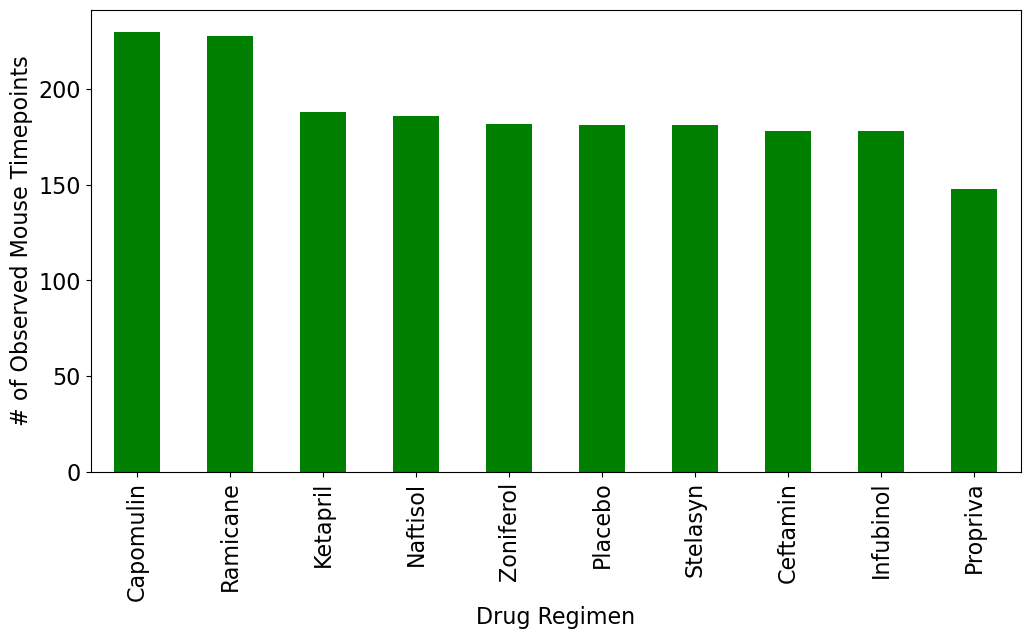

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_timepoints_drugs = mouse_study_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

bar_plot_pandas = bar_timepoints_drugs.plot.bar(rot=90, fontsize=16, figsize=(12,6), color='green')

plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=16)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

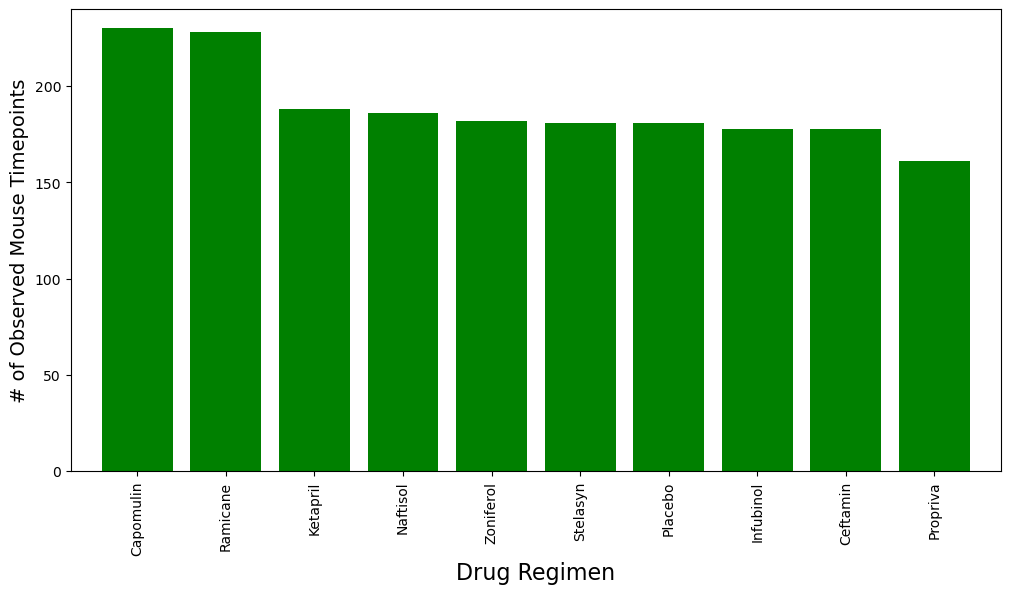

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create an array for timepoints
timepoints_list =(mouse_study_combined_df.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending=False)
timepoints_list

# Bar pyplot
x_axis = np.arange(len(bar_timepoints_drugs))
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis,timepoints_list, color='green')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
                            'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_list)+10)

plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 14)

# Dispoay Timepoint List
timepoints_list

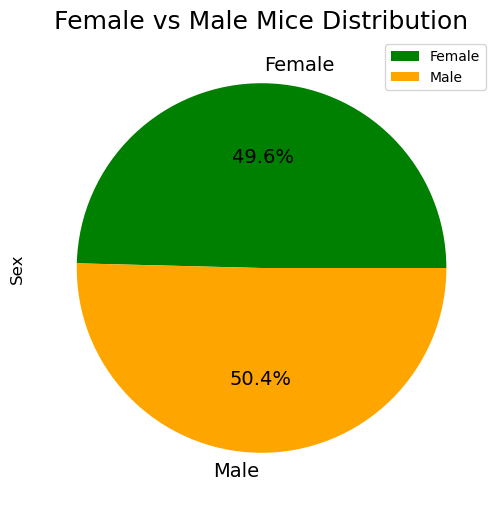

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupedby_gender = mouse_study_clean_df.groupby(["Mouse ID", "Sex"])
groupedby_gender_df = pd.DataFrame(groupedby_gender.size())

mice_gender = pd.DataFrame(groupedby_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

colors = ['green','orange']
m_f_pie_chart_pandas = mice_gender.plot.pie(y="Total Count", 
                                            title= "Female vs Males Mice Distribution", 
                                            fontsize= 14, 
                                            figsize=(6,6),autopct="%1.1f%%",
                                            colors= colors)
plt.title('Female vs Male Mice Distribution',fontsize = 18)
plt.ylabel('Sex',fontsize = 12)
plt.show()

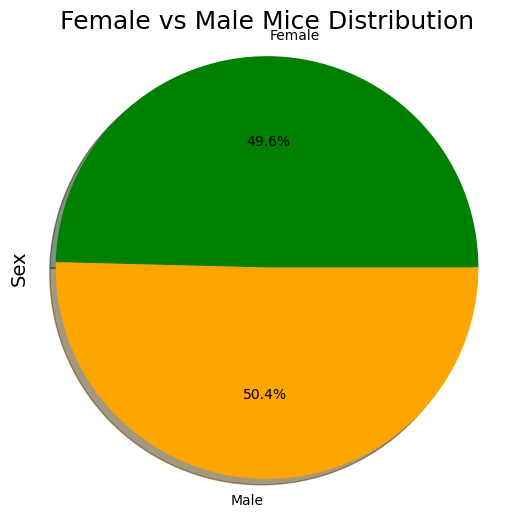

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

total_count_gender = [123,125]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(total_count_gender,labels=labels, autopct="%1.1f%%", 
        colors= colors, shadow= True)
plt.title("Female vs Male Mice Distribution",fontsize = 18)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_study_clean_df, last_timepoint_df, on='Mouse ID')

# Display results
final_timepoint_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1875     m601         25           33.118756                 1    Capomulin   
1876     m601         30           31.758275                 1    Capomulin   
1877     m601         35           30.834357                 1    Capomulin   
1878     m601         40           31.378045                 1    Capomulin   
1879     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  max_Timepoint  
0     Female           9          22             45  
1     Female           9          22             45  
2     Female           9          22             45  
3     Female           9          22             45  
4     Female           9          22             45  
...      ...         ...         ...            ...  
1875    Male          22          17             45  
1876    Male          22          17             45  
1877    Male          22          17             45  
1878    Male          22          17             45  
1879    Male          22          17             45  

[1880 rows x 9 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments_list = final_timepoint_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments_list:
  subset = final_timepoint_df[final_timepoint_df['Drug Regimen'] == treatment]
  q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
  q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
  
  # Print the treatment and the number of outliers
  print(f"Treatment: {treatment}")
  print(f"IQR: {iqr}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Lower Bound: {(lower_bound)}")
  print(f"Upper Bound: {(upper_bound)}")
  print("=======================================")
  
  # Add tumor volume values to the list for plotting
  tumor_volume_values.append(subset['Tumor Volume (mm3)'].values)

Treatment: Capomulin
IQR: 7.314067135000002
Number of outliers: 2
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Treatment: Ketapril
IQR: 12.637963814999999
Number of outliers: 0
Lower Bound: 29.27604157
Upper Bound: 79.82789683
Treatment: Naftisol
IQR: 12.677160092499996
Number of outliers: 0
Lower Bound: 28.270133771250006
Upper Bound: 78.97877414124999
Treatment: Infubinol
IQR: 10.002090667500006
Number of outliers: 0
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Treatment: Stelasyn
IQR: 10.67215848
Number of outliers: 1
Lower Bound: 32.038901100000004
Upper Bound: 74.72753502
Treatment: Ramicane
IQR: 8.325365415
Number of outliers: 1
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Treatment: Zoniferol
IQR: 10.616382797500002
Number of outliers: 0
Lower Bound: 31.413301711249996
Upper Bound: 73.87883290125001
Treatment: Propriva
IQR: 9.597257012500002
Number of outliers: 2
Lower Bound: 32.49844293375
Upper Bound: 70.88747098375
Treatment: Plac

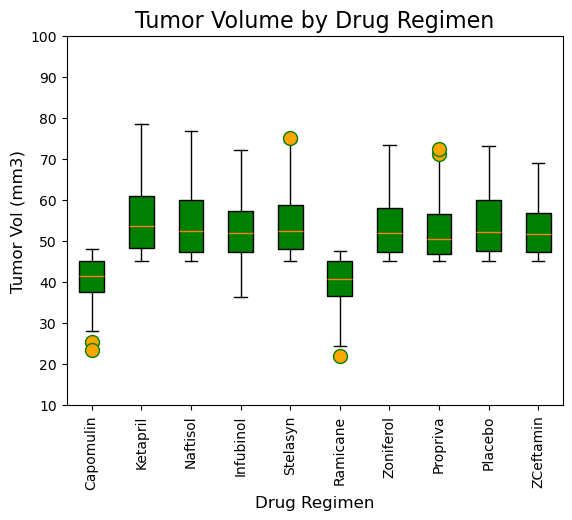

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="orange", markersize=10, markeredgecolor="green")

# Create Boxplot
plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, boxprops=dict(facecolor="green"), flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4,5,6,7,8,9,10], ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 
                            'Stelasyn', 'Ramicane', 'Zoniferol', 'Propriva', 
                            'Placebo', 'ZCeftamin'], rotation='vertical')
#plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(10, 100)

plt.show()

## Line and Scatter Plots

(20.0, 50.0)

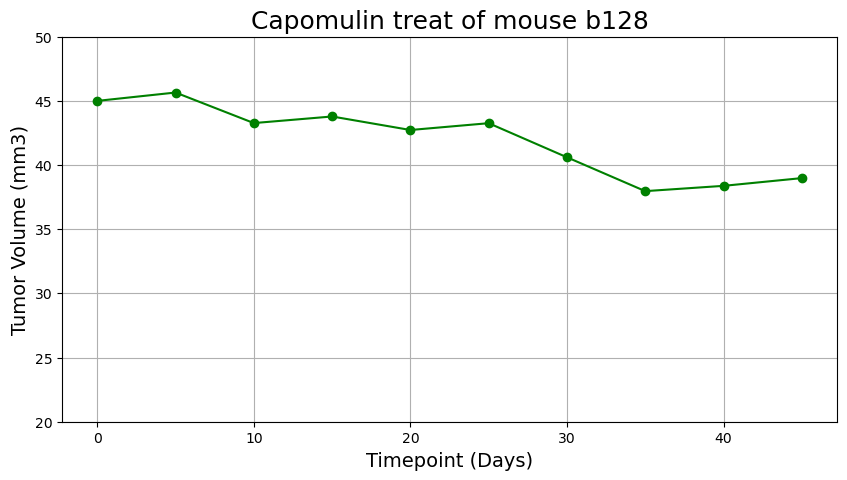

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study_combined_df.loc[mouse_study_combined_df["Drug Regimen"] == "Capomulin",:]

cap_line_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "b128",:]

cap_timepoint_x_axis = cap_line_df["Timepoint"]
cap_tumorsize_y_axis = cap_line_df["Tumor Volume (mm3)"]

fig1, axl = plt.subplots(figsize=(10,5))
plt.plot(cap_timepoint_x_axis, cap_tumorsize_y_axis,
        marker="o", color="green")
plt.title("Capomulin treat of mouse b128", fontsize= 18)
plt.xlabel("Timepoint (Days)", fontsize= 14)
plt.ylabel("Tumor Volume (mm3)", fontsize= 14)
plt.grid(True)
plt.ylim(20, 50)

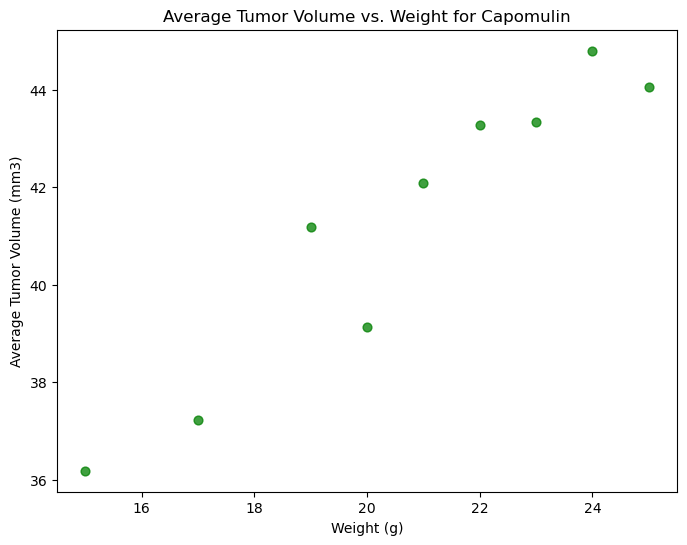

Weight (g)  Tumor Volume (mm3)
0          15           36.182040
1          17           37.214133
2          19           41.182391
3          20           39.141053
4          21           42.088700
5          22           43.288490
6          23           43.341051
7          24           44.805810
8          25           44.062109

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin')

# Display the plot
plt.show()

avg_wgt_tum_df = pd.DataFrame(avg_wgt_tum_vol_cap)

# Dispay Dataframe
avg_wgt_tum_df

# Rese the index of the dataframe
new_index_avg_wgt_df = avg_wgt_tum_df.reset_index()

# Display new index dataframe
new_index_avg_wgt_df

## Correlation and Regression

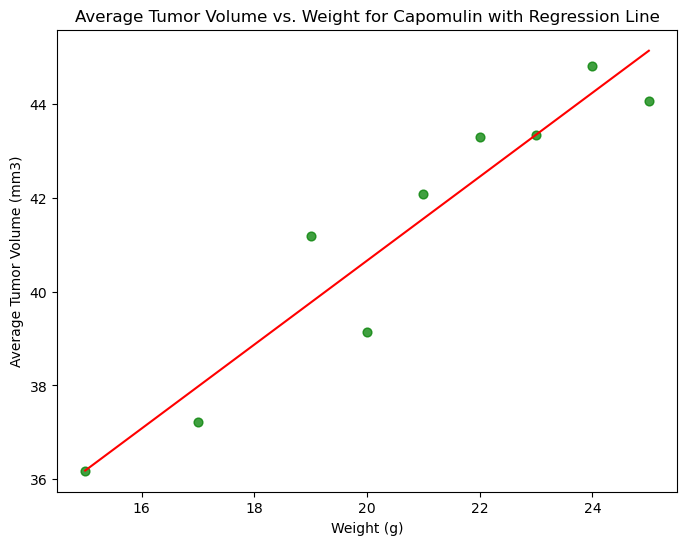

Slope (m): 0.8947726097340611
Y-intercept (b): 22.764229983591935
Standard error of the estimate (SE): 1.0249929158261613
R-squared: 0.9034966277438602
P-value: 0.9999999999999923
Linear Equation: y = 0.8947726097340611(X) + 22.764229983591935


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, 1)

# Create the scatter plot
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)
plt.plot(avg_wgt_tum_vol_cap.index, m * avg_wgt_tum_vol_cap.index + b, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line')

# Display the plot
plt.show()

# Calculate residuals
residuals = new_index_avg_wgt_df['Tumor Volume (mm3)'] - (m * new_index_avg_wgt_df['Weight (g)'] + b)

# Calculate standard error of the estimate (SSE)
sse = np.sum(residuals**2)

# Calculate degrees of freedom
df_freedom = len(new_index_avg_wgt_df) - 2  # 2 for slope and intercept

# Calculate mean squared error (MSE)
mse = sse / df_freedom

# Calculate standard error of the estimate (SE)
se = np.sqrt(mse)

# Calculate r-squared
r_squared = 1 - (sse / np.sum((new_index_avg_wgt_df['Tumor Volume (mm3)'] - new_index_avg_wgt_df['Tumor Volume (mm3)'].mean())**2))

# Calculate p-value
from scipy import stats
t_stat, p_value = stats.ttest_rel(new_index_avg_wgt_df['Tumor Volume (mm3)'], (m * new_index_avg_wgt_df['Weight (g)'] + b))

# Print results
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")